# **Project Overview- Gradient Descent**

**Data Used:** The dataset, "Real-estate-dataset.csv, contains  information about house prices based on features, X1 transaction date,	X2 house age,	X3 distance to the nearest MRT station,	X4 number of convenience stores,	X5 latitude	X6 longitude.

**Process Undertaken:**

**Data Cleaning:** No missing values in dataset and all data is numeric and hence no tranformations are applied.


**Model Training and Evaluation:** A Gradient Descent model was trained on the dataset. The model's performance was evaluated using Theta, R Squareded, RMSE, RSE and the plot used are actual vs predicted prices and residual plot etc

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = '/content/Real-estate-dataset.csv'
housing_df = pd.read_csv(file_path)

# Data Cleaning
# Remove rows based on specific conditions
#conditions = [
 #   (housing_df['bedrooms'] == 33) & (housing_df['bathrooms'] == 1.75),
#  (housing_df['bedrooms'] == 0) & (housing_df['price'] == 1095000),
#    (housing_df['bedrooms'] == 0) & (housing_df['price'] == 380000),
#    (housing_df['bedrooms'] == 33) & (housing_df['area'] == 1620),
#    (housing_df['area'] > 1000000) & (housing_df['bathrooms'] == 1)
#]
#for condition in conditions:
#    housing_df = housing_df.drop(housing_df[condition].index)

# Drop top 1% of the data from the 'price' column
rows_to_drop = int(len(housing_df) * 0.01)
housing_df = housing_df.sort_values('price', ascending=False).iloc[rows_to_drop:]

# Convert categorical 'yes'/'no' columns to numeric
#categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#for col in categorical_cols:
 #   le = LabelEncoder()
  #  housing_df[col] = le.fit_transform(housing_df[col])

# Applying one-hot encoding to the 'furnishingstatus' column
#housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)

# Extract the features (X) and target variable (y)
X = housing_df.drop('price', axis=1).values
y = housing_df['price'].values

# Normalize the data
sc_X = StandardScaler()
X_normalized = sc_X.fit_transform(X)
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized)) # Add intercept term

sc_y = StandardScaler()
y_normalized = np.ravel(sc_y.fit_transform(y.reshape(-1, 1)))

# Gradient Descent Functions
def compute_cost(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

def gradient_function(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    grad = (1 / m) * X.T.dot(h - y)
    return grad

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    grad_magnitude_history = []

    for i in range(iterations):
        gradient = gradient_function(X, y, theta)
        grad_magnitude = np.linalg.norm(gradient)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        grad_magnitude_history.append(grad_magnitude)

    return theta, cost_history, grad_magnitude_history

# Model Training
alpha = 0.01
iterations = 1000
theta = np.zeros(X_normalized.shape[1])

theta_final, cost_history, grad_magnitude_history = gradient_descent(X_normalized, y_normalized, theta, alpha, iterations)

# Print final parameters (optional)
print("Final parameters:", theta_final)

Final parameters: [ 1.12831782e-13 -4.66192342e-02  8.02976910e-02 -2.49318474e-01
 -3.60602941e-01  2.78459664e-01  2.32239822e-01  3.90414848e-02]


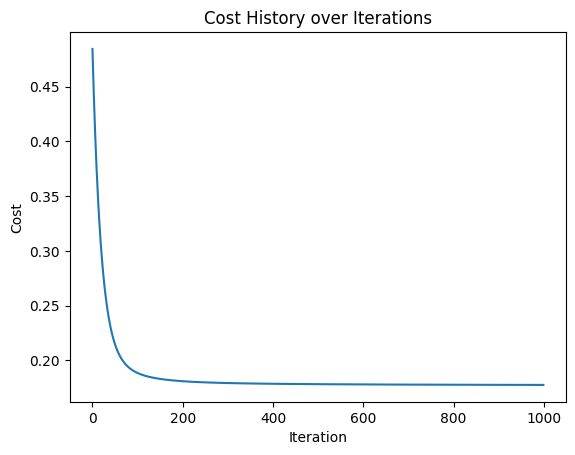

In [3]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History over Iterations')
plt.show()


In [4]:
# Calculate predictions on the normalized features
y_pred_normalized = X_normalized.dot(theta_final)

# Rescale the predictions back to the original scale
y_pred = sc_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared:", r_squared)


Mean Squared Error: 56.7760156220555
Root Mean Squared Error: 7.534986106294789
R-squared: 0.6448723788935375


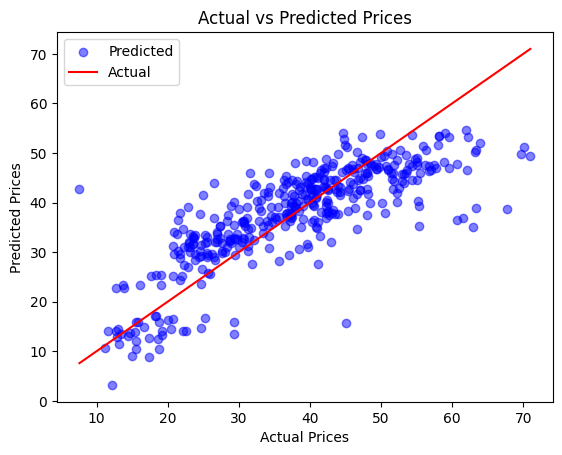

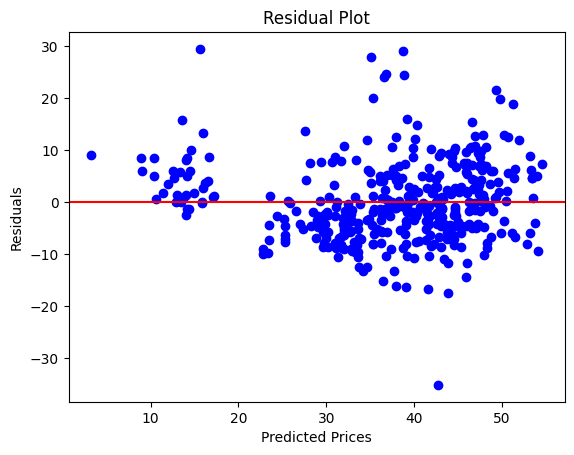

In [5]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred):
    """
    Plots the actual vs predicted values.
    """
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predicted')
    plt.plot(y_test, y_test, color='red', label='Actual')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.legend()
    plt.show()

def plot_residuals(y_test, y_pred):
    """
    Plots the residuals of the model.
    """
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='-')
    plt.title("Residual Plot")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Residuals")
    plt.show()

# Assuming y is your actual data and y_pred is the predictions from your model
plot_predictions(y, y_pred)
plot_residuals(y, y_pred)


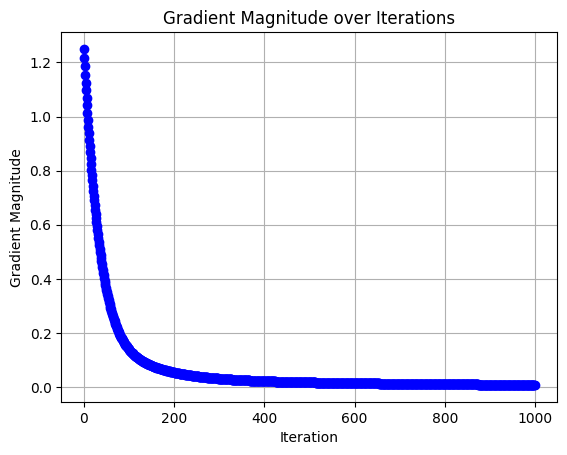

In [6]:
import matplotlib.pyplot as plt

# Check if grad_magnitude_history is not empty
if grad_magnitude_history:
    # Plot the magnitude of the gradient vector over iterations
    plt.plot(grad_magnitude_history, marker='o', linestyle='-', color='b')
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Magnitude')
    plt.title('Gradient Magnitude over Iterations')
    plt.grid(True)
    plt.show()
else:
    print("The grad_magnitude_history list is empty.")
